In [102]:
import pandas as pd
import numpy as np
import yaml
import glob
import os
import os.path
import csv
import json
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
def load_from_yaml(t):
    stream = file(t, 'r')
    dic=yaml.load(stream)
    return dic

def load_from_csv(t):
    temp=[]
    with open(t, 'rb') as csvfile:
        rdata = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in rdata:
            if(row[0]=='info'):
                temp.append(row[2])                
    return temp


def change_winner(x):
    if(x=='SunrisersHyderabad'):
        return 'Sunrisers Hyderabad'
    if(x=='RisingPuneSupergiants'):
        return 'Rising Pune Supergiant'
    if(x=='KolkataKnightRiders'):
        return 'Kolkata Knight Riders'
    if(x=='KingsXIPunjab'):
        return 'Kings XI Punjab'
    if(x=='RoyalChallengersBangalore'):
        return 'Royal Challengers Bangalore'
    if(x=='MumbaiIndians'):
        return 'Mumbai Indians'
    if(x=='DelhiDaredevils'):
        return 'Delhi Daredevils'
    if(x=='GujaratLions'):
        return 'Gujarat Lions'
    if(x=='ChennaiSuperKings'):
        return 'Chennai Super Kings'
    if(x=='RajasthanRoyals'):
        return 'Rajasthan Royals'
    if(x=='DeccanChargers'):
        return 'Deccan Chargers'
    if(x=='PuneWarriors'):
        return 'Pune Warriors'
    if(x=='KochiTuskersKerala'):
        return 'Kochi Tuskers Kerala'
    if(x=='result:noresult'):
        return 'result:noresult'
    else:
        return x


def won_by_side(x,y,z):
    if(str(z)=='field' & str(x)==str(y)):
        return 'Batting 2nd Side'
    else:
        return 'Batting 1st Side'

In [3]:
#iplmatches_info2={}

#for i in glob.glob("./ipl_csv/*.csv"):
#    key=i.split('/')[-1].replace('.csv','')
#    temp=load_from_csv(i)
#    iplmatches_info2[key]=temp
    
#index_df=pd.Series(['team1','team2','gender','season','date','competition','match_number','venue','city','toss_winner','toss_decision','player_of_match','umpire1','umpire2','reserve_umpire','tv_umpire','match_referee','winner','winner_runs','dummy','dummy1'])
#df=pd.DataFrame.from_dict(iplmatches_info2, orient='index')
#df.columns=index_df

abc

In [4]:
#iplmatches_info={}


#for i in glob.glob("./ipl/*.yaml"):
#    key=i.split('/')[-1].replace('.yaml','')
#    temp = load_from_yaml(i)
#    iplmatches_info[key]=temp['info']
    

In [5]:
#df=pd.DataFrame(iplmatches_info).T

In [6]:
# Exporting to excel for cleaning
#df.to_excel('ipl_data1.xlsx')

In [7]:
# Importing the clean data from Excel
ipl_data=pd.read_excel('ipl_data.xlsx')

In [9]:
#Convert to date 
#ipl_data['dates'] = pd.to_datetime(ipl_data['dates'])

#Extracting Year
#ipl_data['year']=ipl_data['dates'].apply(lambda x: str(x)[:4])

# winner team proper convresion
#ipl_data['winner']=ipl_data['winner'].apply(change_winner)

#removing eliminator
#ipl_data['winner']=ipl_data['winner'].apply(lambda x: str(x).replace('eliminator: ', '').replace('RisingPuneSupergiantss','RisingPuneSupergiants'))

In [11]:
#bk_by_city=ipl_data.groupby([ 'wickets/runs','year'])['year'].count()
#bk_by_city.unstack().T

In [425]:
titanic=sns.load_dataset('titanic')

In [427]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


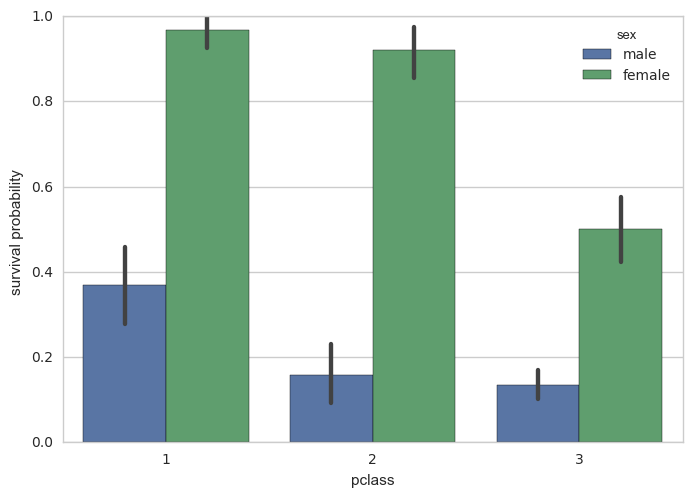

In [439]:
g=sns.barplot(x='pclass', y='survived',hue='sex',data=titanic)
g.set_ylabel("survival probability ")

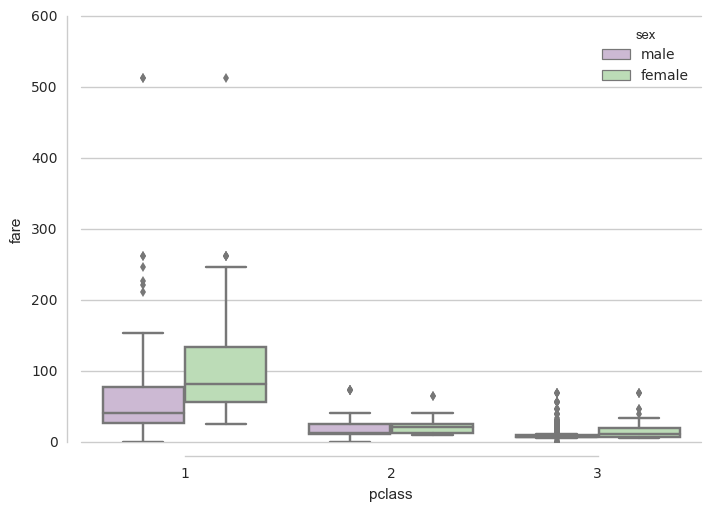

In [440]:
sns.boxplot(x="pclass", y="fare", hue="sex", data=titanic, palette="PRGn")
sns.despine(offset=10, trim=True)

In [296]:
ipl_final=pd.read_excel("ipl_data_final.xlsx",sheetname="Final")

In [297]:
ipl_final.reset_index(inplace=True)

In [308]:
ipl_final.to_json('ipl_final.json', orient='records')

In [310]:
#import datetime
#ipl_final['year']=ipl_final['date'].dt.year


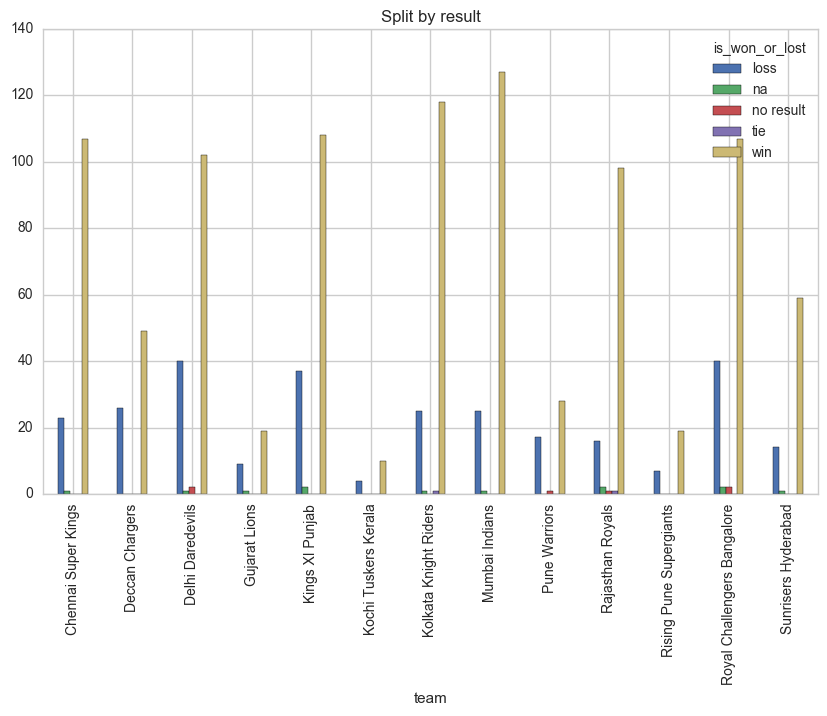

In [206]:
x=pd.DataFrame(pd.pivot_table(ipl_final, columns=['is_won_or_lost'], index=['team'], aggfunc='count')['Id'])
x.fillna('0')
x.plot(kind='bar',sort_columns='is_won_or_lost',figsize=[10,6],title='Split by result')

In [204]:
x.fillna(0.0)

is_won_or_lost,loss,na,no result,tie,win
team,,,,,
Chennai Super Kings,23.0,1.0,0.0,0.0,107.0
Deccan Chargers,26.0,0.0,0.0,0.0,49.0
Delhi Daredevils,40.0,1.0,2.0,0.0,102.0
Gujarat Lions,9.0,1.0,0.0,0.0,19.0
Kings XI Punjab,37.0,2.0,0.0,0.0,108.0
Kochi Tuskers Kerala,4.0,0.0,0.0,0.0,10.0
Kolkata Knight Riders,25.0,1.0,0.0,1.0,118.0
Mumbai Indians,25.0,1.0,0.0,0.0,127.0
Pune Warriors,17.0,0.0,1.0,0.0,28.0


In [304]:
"""def form_list(a,b):
    l=[]
    l.append(a)
    l.append(b)
    return l

with open('ipl_final.json') as json_file:  
    data = json.load(json_file)
    
    
for i in data:
    t=i['host']
    o=i['visiting']
    i['teams']=form_list(t, o)
    
df=pd.DataFrame(data)
df.to_json('xyz.json',orient='records')
"""

"def form_list(a,b):\n    l=[]\n    l.append(a)\n    l.append(b)\n    return l\n\nwith open('ipl_final.json') as json_file:  \n    data = json.load(json_file)\n    \n    \nfor i in data:\n    t=i['host']\n    o=i['visiting']\n    i['teams']=form_list(t, o)\n    \ndf=pd.DataFrame(data)\ndf.to_json('xyz.json',orient='records')\n"

In [309]:
ipl_final.head()

,Index,Id,ipl_season,Match,year,date,team,host_or_visiting,opponent,is_won_or_lost,...,player_of_match,umpires,is_neutral_home_away_match,city,venue,toss_status,toss_wining_team_opted_for,bat_ball_first,measure,short_name
0,1,335982,1,1,2008,2008-04-18,Royal Challengers Bangalore,host,Kolkata Knight Riders,loss,...,BB McCullum,Asad Rauf,home,Bangalore,M Chinnaswamy Stadium,won,field,ball,1,RCB
1,304,335982,1,1,2008,2008-04-18,Kolkata Knight Riders,visiting,Royal Challengers Bangalore,win,...,BB McCullum,RE Koertzen,away,Bangalore,M Chinnaswamy Stadium,loss,field,bat,1,KKR
2,2,335983,1,2,2008,2008-04-19,Kings XI Punjab,host,Chennai Super Kings,loss,...,MEK Hussey,MR Benson,home,Chandigarh,"Punjab Cricket Association Stadium, Mohali",loss,bat,ball,1,KXIP
3,305,335983,1,2,2008,2008-04-19,Chennai Super Kings,visiting,Kings XI Punjab,win,...,MEK Hussey,SL Shastri,away,Chandigarh,"Punjab Cricket Association Stadium, Mohali",won,bat,bat,1,CSK
4,587,335984,1,3,2008,2008-04-19,Delhi Daredevils,host,Rajasthan Royals,win,...,MF Maharoof,Aleem Dar,away,Delhi,Feroz Shah Kotla,loss,bat,ball,1,DD
